## <b>Bank Customer Segmentation Machine Learning</b>
### by : <b>Idam Habib Ahmadi - JCDS 0106 007</b></br>

### <br><br><b>1. Background Understanding</b>

Firs't lets look dataset for better understanding

In [36]:
import pandas as pd
import numpy as np

import warnings

In [37]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


### <b>Let's look back what is background given by client</b>

<i>"The term deposit mechanism is that a customer deposits a sum of money at a bank or a financial institution, and the money can only be withdrawn after a certain period of time. As compensation, customers will be given a fixed interest according to the nominal amount of money deposited.

Nevertheless, as business entities with financial products and respective customers, banks still have to compete to not lose customers. One of the ways to acquire new customers is by conducting a marketing campaign."</i>


##### <b>This is insight that we can get from description above</b>

• The goals of the marketing campaign was to make customer deposit<br>
• Marketing team need to deliver campaign to acquire new deposit<br>
• From dataset we know that this company conduct marketing campaign mostly by Telemarketing<br>
• Bank usually have massive database and hard to optimized by Telemarketing<br>

• <b>The machine learning will help Telemarketer by classify custommer that have high deposit probability</b><br>
• <b>Bank must reduce *False Negative* (recall) so they can acquire more customers to maximize omzet</b><br>
• <b>But in same time need to reduce *False Positive* (precision) because the limit of Telemarketing  to resource efficient</b><br>
##### • <b>So in this case we will use f1_score to balance precision and recall </b><br>


### <br><b>For better understanding let's look feature descriptions</b>

• <b>contact:</b> Contact communication type<br>
• <b>month:</b> Last contact month of the year<br>
• <b>campaign:</b> Number of contacts performed during this campaign and for this client<br>
• <b>pdays:</b> Number of days after the client was contacted from the previous campaign<br>
• <b>poutcome:</b> Outcome of the previous marketing campaign<br>
• <b>deposit:</b> Whether the customer deposits or not<br>



### <br><b>2. Check Columns</b>

All of the columns have correct Dtype and don't have missing value</br>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


• 'balance' have minus values which is impossible in real case -> absolute the value</br>
• 'pdays' have -1 in the value, we sure it was unfilled data -> convert it to NaN</br>
• 'contact' and 'poutcome' have unknown value and we sure it was unfilled data too -> convert it to NaN</br>
• 'deposit' will convert to 1 for 'yes' and 0 for'no</br>

In [39]:
display(
    df.describe(),
    pd.DataFrame({
    'Features':df.describe(include=['O']).columns,
    'Unique Count':df.describe(include=['O']).loc['unique'].values,
    'Unique List':[list(df[i].unique()) for i in df.describe(include=['O']).columns],
})
)

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,Features,Unique Count,Unique List
0,job,12,"[admin., self-employed, services, housemaid, t..."
1,housing,2,"[no, yes]"
2,loan,2,"[no, yes]"
3,contact,3,"[cellular, telephone, unknown]"
4,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
5,poutcome,4,"[unknown, other, failure, success]"
6,deposit,2,"[yes, no]"


### <br><b>3. Data Cleaning</b>

Convert deposit to 1 for 'yes' and 0 for 'no' done</br>

In [40]:
df['deposit'] = np.where(df['deposit'] == 'yes',1,0)
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


From now we need draw graphic to explore data</br>

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

This heatmap show there is no strong correlation in nummerical columns</br>

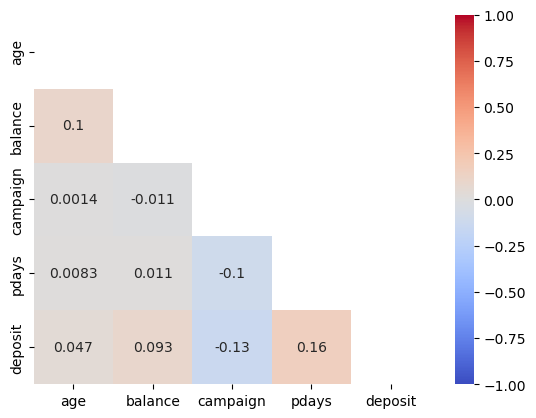

In [42]:
sns.heatmap(
    df.corr(),
    center=0,
    annot=True,
    mask=np.triu(np.ones_like(df.corr(),
    dtype=bool)),
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

plt.show()

• Absoluting minus values in 'balance' done</br>
• Convert -1 to NaN in 'pdays' done</br>
• There is no change in correlation</br>

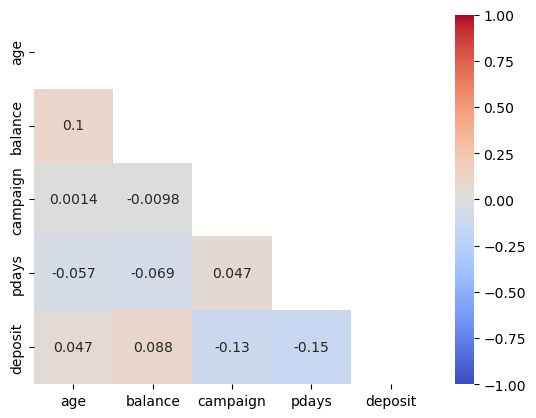

In [43]:
df['balance'] = abs(df['balance'])
df['pdays'] = np.where(df['pdays']==-1,np.nan,df['pdays'])

sns.heatmap(
    df.corr(),
    # center=1,
    annot=True,
    mask=np.triu(np.ones_like(df.corr(),
    dtype=bool)),
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

plt.show()

Convert unknown value in 'contact' and 'poutcome' done

In [44]:
df['poutcome'] = np.where(df['poutcome']=='unknown',np.nan,df['poutcome'])
df['contact'] = np.where(df['contact']=='unknown',np.nan,df['contact'])

df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,NaN,NaN,1
1,39,self-employed,3058,yes,yes,cellular,apr,3,NaN,NaN,1
2,51,admin.,3025,no,no,cellular,may,1,352.0,other,1
3,38,services,87,yes,no,cellular,may,1,NaN,NaN,0
4,36,housemaid,205,yes,no,telephone,nov,4,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,NaN,NaN,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184.0,success,1
7810,36,unknown,179,no,no,cellular,aug,8,NaN,NaN,0
7811,31,admin.,54,yes,no,cellular,nov,1,NaN,NaN,0


• The NaN values are high and we cant drop this since it will impact the Machine Learning</br>
• NaN values in 'pdays' and 'contact' we will fill it with Iterative / Simple Imputer</br>
• For NaN values in 'poutcome' we will ordinal encode depend on correlation with 'deposit'  </br>

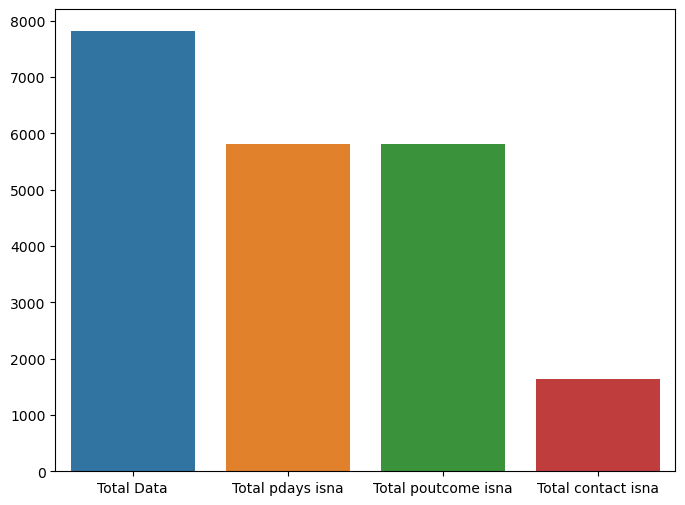

In [45]:
plt.figure(figsize=(8,6))

a = pd.DataFrame({
    'Total Data':[len(df)],
    'Total pdays isna':[df.isna().sum()['pdays']],
    'Total poutcome isna':[df.isna().sum()['poutcome']],
    'Total contact isna':[df.isna().sum()['contact']],
    })

sns.barplot(data=a)

plt.show()

• The outliers that far from other outliers will be dropped</br>
• In this case 'balance' > 30000 | 'campaign' > 30 | 'age' > 90 will get drop</br>

Total Data : 7813


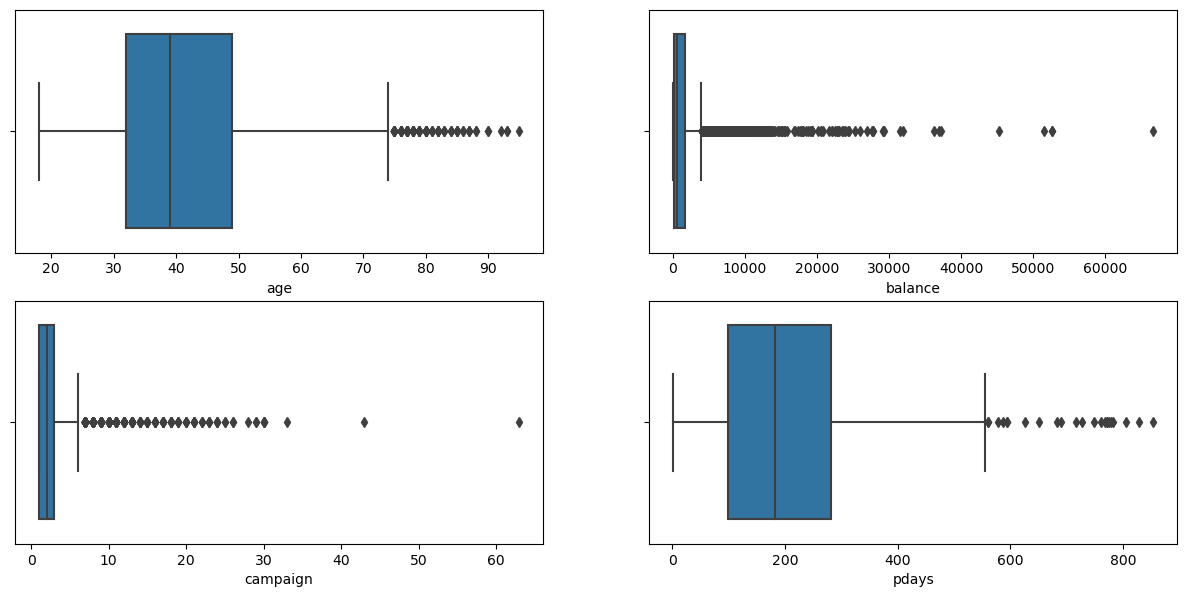

In [46]:
a = df.describe().T
a = a[
    (a['min'] == 0) & (a['max'] == 1) &
    (a['25%'] == 0) | (a['25%'] == 1) &
    (a['50%'] == 0) | (a['50%'] == 1) &
    (a['75%'] == 0) | (a['75%'] == 1)
].index

n = 1

plt.figure(figsize=(15,75))

for i in df.describe():
    if i not in a:
        plt.subplot(20,2,n)
        sns.boxplot(data=df,x=i)
        n += 1
    else:
        continue

print(f'Total Data : {df.shape[0]}')

Total Data Remaining : 7790


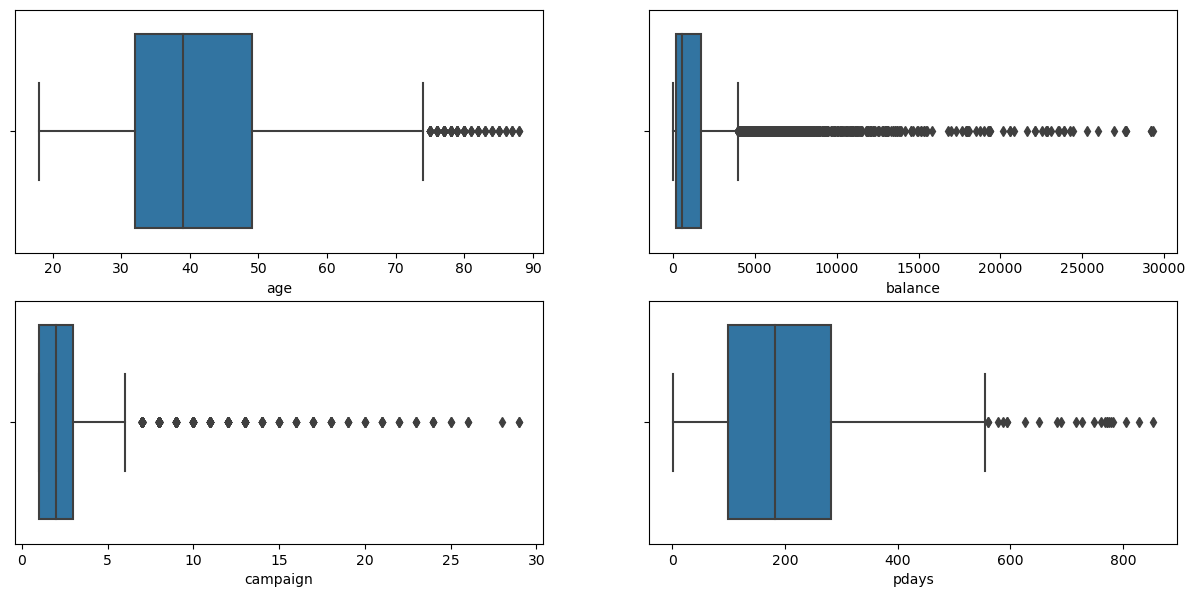

In [47]:
df = df[(df['age']<90)&(df['balance']<30000)&(df['campaign']<30)]

a = df.describe().T
a = a[
    (a['min'] == 0) & (a['max'] == 1) &
    (a['25%'] == 0) | (a['25%'] == 1) &
    (a['50%'] == 0) | (a['50%'] == 1) &
    (a['75%'] == 0) | (a['75%'] == 1)
].index

n = 1

plt.figure(figsize=(15,75))

for i in df.describe():
    if i not in a:
        plt.subplot(20,2,n)
        sns.boxplot(data=df,x=i)
        n += 1
    else:
        continue

print(f'Total Data Remaining : {df.shape[0]}')

### <br><b>4. EDA</b>

It seems the more 'balance' they have the more they decide to 'deposit'</br>

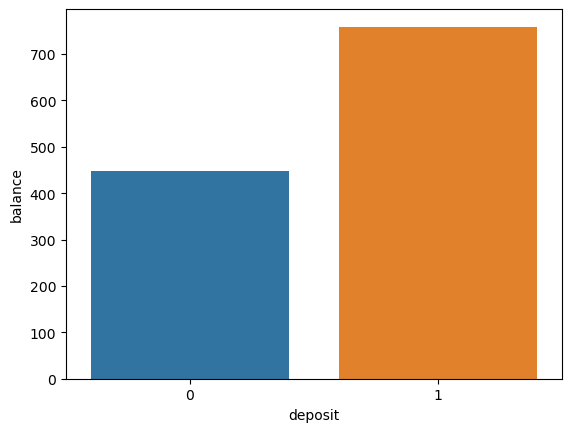

In [48]:
a = df.groupby(by='deposit').median()[['balance']].reset_index()

sns.barplot(data=a,x='deposit',y='balance')

plt.show()

• In 'poutcome' nan and failure encoded to 0, other : 1, and success : 2<br>
• It means the better 'deposit' ratio the higher ordinal encoding will be<br>
• nan will be impute with failure, this just shortcut so we dont need create impute<br> 

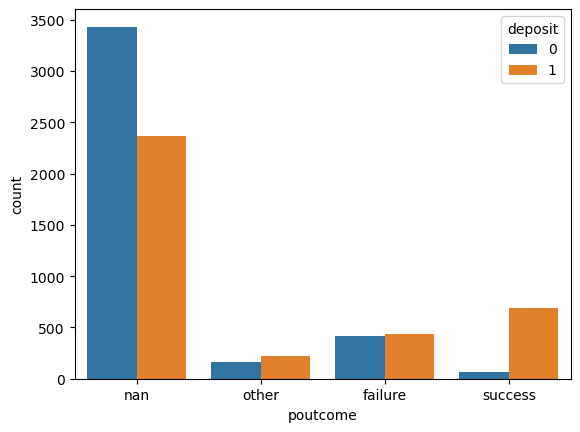

In [49]:
a = df.copy()
a['poutcome'].fillna('nan',inplace=True)

sns.countplot(
    data=a,
    x='poutcome',
    hue='deposit',
)

plt.show()

• Month feb, mar, apr, sep, oct have a good result<br>
• Person with job 'retired', and 'student' have a good result<br>

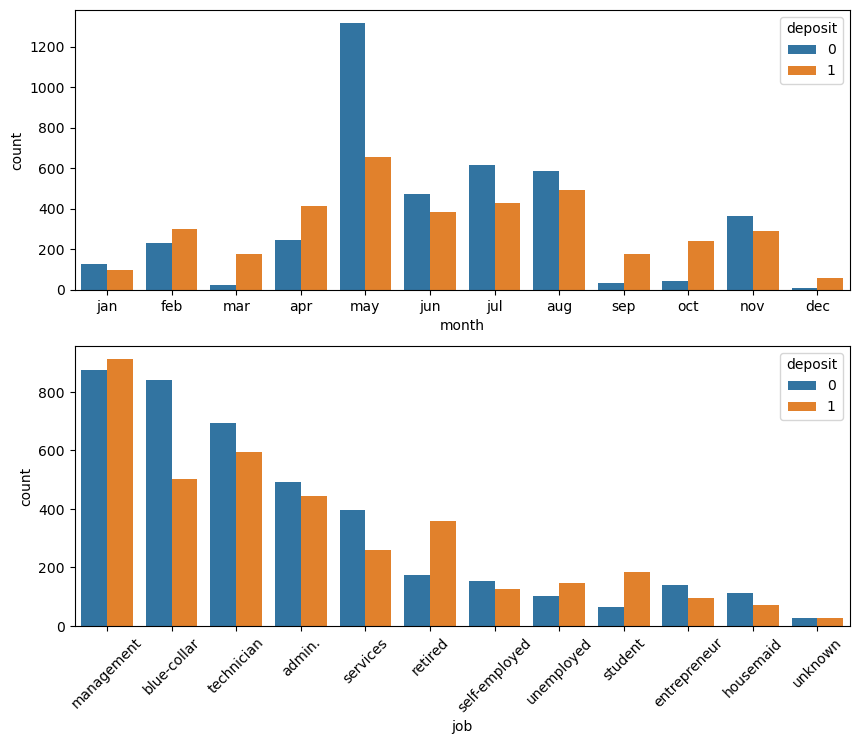

In [50]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
sns.countplot(
    data=df,
    x='month',
    hue='deposit',
    order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
)

plt.subplot(2,1,2)
sns.countplot(
    data=df,
    x='job',
    hue='deposit',
    order=df['job'].value_counts().index
)
plt.xticks(rotation=45)

plt.show()

This is the ratio and ordinal order from job

In [51]:
a = df.copy()
a['count'] = 1

b = pd.pivot_table(a,values='count',index='job',columns='deposit',aggfunc='count')
b['ratio'] = b[1]/b[0]
b['ordinal'] = (b['ratio'].rank())
b.sort_values(by='ordinal',ascending=False)

deposit,0,1,ratio,ordinal
job,,,,
student,63,184,2.920635,12.0
retired,174,359,2.063218,11.0
unemployed,102,147,1.441176,10.0
management,876,912,1.041096,9.0
unknown,28,26,0.928571,8.0
admin.,492,444,0.902439,7.0
technician,694,594,0.855908,6.0
self-employed,153,125,0.816993,5.0
entrepreneur,140,94,0.671429,4.0


As for age, they who < 30 and > 60 have a good result

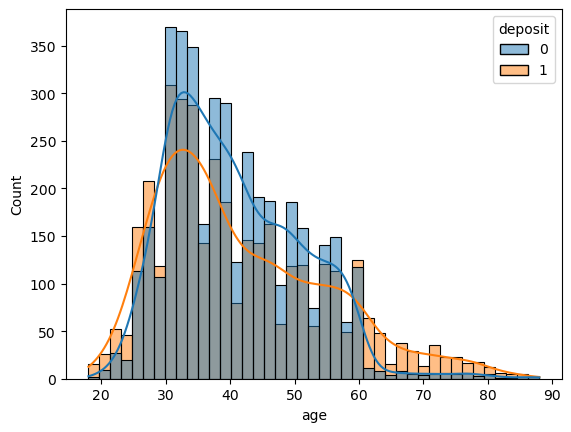

In [52]:
sns.histplot(data=a,x='age',hue='deposit',kde=True)
plt.show()

### <br><b>5. Preprocessing</b>

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

# Import Scaler
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

Feature selection and Engineering<br>

• We will use all features avaliable since we only have few features<br>
• We have tested Polynomial 1,2,3 and 2 give the best value<br>
• Also tested several combination but below give the best value on our case<br>

• NaN 'pdays' and 'contact' fills with iterative imputer<br>
• job, month, poutcome will get ordinal encoding<br>
• housing, loan, contact will get onehot encoding<br>

In [54]:
# Mapping for Ordinal Encoding
ordinal_map = [
    {'col':'job',
    'mapping':{None:0,np.NaN:0,'student':12,'retired':11,
    'unemployed':10,'management':9,'unknown':8,'admin.':7,'technician':6,
    'self-employed':5,'entrepreneur':4,'services':3,'housemaid':2,'blue-collar':1}},
    {'col':'month',
    'mapping':{None:0,np.NaN:0,'jan':1,'feb':2,'mar':3,'apr':4,'may':5,
    'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}},
    {'col':'poutcome',
    'mapping':{None:0,np.NaN:0,'failure':0,'other':1,'success':2}}
]

scaler = RobustScaler()

# Make simple imputer -> one hot encoding
simple_onehot = Pipeline([
    ('simple_impute',SimpleImputer(strategy='most_frequent')),
    ('onehot_encode',OneHotEncoder(drop='first'))
])

iter_scale = Pipeline([
    ('iter_impute',IterativeImputer()),
    ('scaler',scaler)
])

# Create transformer
transformer = ColumnTransformer([
    ('simple_onehot',simple_onehot,['contact']),
    ('onehot_encode',OneHotEncoder(drop='first'),['housing','loan']),
    ('odrinal_encode',ce.OrdinalEncoder(mapping=ordinal_map),['job','month','poutcome']),
    ('iter_scale',iter_scale,['pdays']),
    ('scaler',scaler,['age','balance','campaign'])
],remainder='passthrough')

This is how transformed dataset looks like

In [55]:
a = transformer.fit(df).transformers_[0][1][1].get_feature_names_out()
a = list(a)

b = transformer.fit(df).transformers_[1][1].get_feature_names_out()
b = list(b)

c = transformer.fit(df).transformers_[2][1].get_feature_names_out()
c = list(c)

d = transformer.fit(df).transformers_[3][2]
d = list(d)

e = transformer.fit(df).transformers_[4][2]
e = list(e)

f = transformer.fit(df).transformers_[5][2]
f = df.columns[f]
f = list(f)

column_transformed = a+b+c+d+e+f

pd.DataFrame(
    data = transformer.fit_transform(df),
    columns=column_transformed
)

,x0_telephone,housing_yes,loan_yes,job,month,poutcome,pdays,age,balance,campaign,deposit
0,0.0,0.0,0.0,7.0,6.0,0.0,0.000000,0.941176,0.727574,0.0,1.0
1,0.0,1.0,1.0,5.0,4.0,0.0,0.000000,0.000000,1.653457,0.5,1.0
2,0.0,0.0,0.0,7.0,5.0,1.0,147.684237,0.705882,1.631570,-0.5,1.0
3,0.0,1.0,0.0,3.0,5.0,0.0,0.000000,-0.058824,-0.317029,-0.5,0.0
4,1.0,1.0,0.0,2.0,11.0,0.0,0.000000,-0.176471,-0.238766,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7785,0.0,0.0,0.0,2.0,11.0,0.0,0.000000,1.352941,-0.373404,-0.5,1.0
7786,0.0,0.0,0.0,2.0,2.0,2.0,-20.315763,0.529412,3.255182,0.0,1.0
7787,0.0,0.0,0.0,8.0,8.0,0.0,0.000000,-0.176471,-0.256011,3.0,0.0
7788,0.0,1.0,0.0,7.0,11.0,0.0,0.000000,-0.470588,-0.338916,-0.5,0.0


### <br><b>5. Create Model</b>

Let's start with 7 models :<br>

• Logistic Regression<br>
• K Neighbors Classifier<br>
• Decision Tree<br>
• Random Forest<br>
• XG Boost Tree<br>
• Light GBM Tree<br>

In [56]:
#Install Model
# pip install xgboost
# pip install lightgbm

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm

Why and what metric we are using?

• precision to reduce FP for resource efficient / **minimize cost** but the **omzet more likely lower** <br>
• recall to reduce FN for **maximize omzet** from data pool but the **cost more likely higher**<br>
• f1 to **balance** the precision and recall<br>
• f05 it's like **f1** unless it's more **precision oriented**<br>
• f2 it's like **f1** unless it's more **recall oriented**<br>

• Maximize omzet is great idea but the cost will go high, and **that omzet someday will given back to custommer** so be aware<br>
• Minimize cost however sound safer option, but it **limit business growth** and make us **behind competition**<br>
• In this case we are **using f1** and will give recomendation based on the business problem

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, fbeta_score, confusion_matrix, classification_report
f05_score = make_scorer(fbeta_score,beta=0.5)
f2_score = make_scorer(fbeta_score,beta=2)

Nex't split data into X and y

In [58]:
X = df.drop(columns='deposit')
y = df['deposit']

display(X,y)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,55,admin.,1662,no,no,cellular,jun,2,NaN,NaN
1,39,self-employed,3058,yes,yes,cellular,apr,3,NaN,NaN
2,51,admin.,3025,no,no,cellular,may,1,352.0,other
3,38,services,87,yes,no,cellular,may,1,NaN,NaN
4,36,housemaid,205,yes,no,telephone,nov,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,NaN,NaN
7809,48,housemaid,5473,no,no,cellular,feb,2,184.0,success
7810,36,unknown,179,no,no,cellular,aug,8,NaN,NaN
7811,31,admin.,54,yes,no,cellular,nov,1,NaN,NaN


0       1
1       1
2       1
3       0
4       0
       ..
7808    1
7809    1
7810    0
7811    0
7812    1
Name: deposit, Length: 7790, dtype: int32

The data are still balance so it's no need to future sampler

In [59]:
y.value_counts()

0    4069
1    3721
Name: deposit, dtype: int64

Split the train and test set with 80:20 ratio

In [60]:
X_tr,X_ts,y_tr,y_ts = train_test_split(X, y, train_size=0.8, stratify=y, random_state=0)

X_tr

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
2548,58,unemployed,1625,no,no,cellular,feb,2,NaN,NaN
6779,57,technician,589,yes,no,cellular,aug,1,190.0,failure
7714,30,management,5561,yes,no,cellular,nov,1,NaN,NaN
5706,57,unemployed,209,no,no,NaN,jun,1,NaN,NaN
2069,46,management,337,no,yes,cellular,aug,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6374,40,blue-collar,438,no,no,cellular,may,1,NaN,NaN
3209,35,admin.,182,yes,no,NaN,jun,1,NaN,NaN
4202,55,blue-collar,1613,yes,no,cellular,apr,1,270.0,failure
408,49,technician,808,yes,no,cellular,jan,1,NaN,NaN


Define the starting model

In [61]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
forest = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
xgb = XGBClassifier()
lgb = lgbm.LGBMClassifier(random_state=0)

list_models = [logreg,knn,tree,forest,ada,xgb,lgb]

Now compare models cross validation using f1 score<br>

In [62]:
df_result = pd.DataFrame(columns=['model','cv mean','cv std', 'TP', 'FP', 'TN', 'FN'])

for i in list_models:

    pipe_model = Pipeline([
        ('transformer',transformer),
        ('poly',PolynomialFeatures(degree=1)),
        ('model',i)
    ])

    cv_score = cross_val_score(
        estimator=pipe_model,
        X=X_tr,
        y=y_tr,
        cv=5,
        scoring='f1',
        error_score='raise'
    )

    pipe_model.fit(X_tr,y_tr)

    y_pred = pipe_model.predict(X_ts)

    matrix = confusion_matrix(y_ts,y_pred)

    warnings.filterwarnings('ignore')

    df_result.loc[len(df_result)] = [i,cv_score.mean(),cv_score.std(),matrix[1][1],matrix[0][1],matrix[0][0],matrix[1][0]]

df_result

,model,cv mean,cv std,TP,FP,TN,FN
0,LogisticRegression(random_state=0),0.621967,0.017604,437,232,582,307
1,KNeighborsClassifier(),0.614320,0.013548,446,238,576,298
2,DecisionTreeClassifier(random_state=0),0.587405,0.013669,447,312,502,297
3,"(DecisionTreeClassifier(max_features='auto', r...",0.636574,0.023455,467,222,592,277
4,"(DecisionTreeClassifier(max_depth=1, random_st...",0.646191,0.018056,450,160,654,294
5,"XGBClassifier(base_score=None, booster=None, c...",0.642899,0.021757,452,220,594,292
6,LGBMClassifier(random_state=0),0.644841,0.026007,458,165,649,286


Now we try Voting and Stacking Classifier using the models<br>

In [63]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

• It's shown Stacking have highest score and TP<br>
• <b> So we decide to use Stacking as our best model </b>

In [64]:
estimator = [[str(model).split('(')[0],model] for model in list_models]

voting = VotingClassifier(
    estimators=estimator
)

stacking = StackingClassifier(
    estimators=estimator
)

list_voting_stacking = [voting,stacking]

In [65]:
for i in list_voting_stacking:

    pipe_model = Pipeline([
        ('transformer',transformer),
        ('poly',PolynomialFeatures(degree=2)),
        ('model',i)
    ])

    cv_score = cross_val_score(
        estimator=pipe_model,
        X=X_tr,
        y=y_tr,
        cv=5,
        scoring='f1',
        error_score='raise'
    )

    pipe_model.fit(X_tr,y_tr)

    y_pred = pipe_model.predict(X_ts)

    matrix = confusion_matrix(y_ts,y_pred)

    warnings.filterwarnings('ignore')

    df_result.loc[len(df_result)] = [i,cv_score.mean(),cv_score.std(),matrix[1][1],matrix[0][1],matrix[0][0],matrix[1][0]]

df_result.sort_values(by='cv mean', ascending=False)

,model,cv mean,cv std,TP,FP,TN,FN
8,StackingClassifier(estimators=[['LogisticRegre...,0.650920,0.020493,471,192,622,273
4,"(DecisionTreeClassifier(max_depth=1, random_st...",0.646191,0.018056,450,160,654,294
7,VotingClassifier(estimators=[['LogisticRegress...,0.645265,0.017301,460,185,629,284
6,LGBMClassifier(random_state=0),0.644841,0.026007,458,165,649,286
5,"XGBClassifier(base_score=None, booster=None, c...",0.642899,0.021757,452,220,594,292
3,"(DecisionTreeClassifier(max_features='auto', r...",0.636574,0.023455,467,222,592,277
0,LogisticRegression(random_state=0),0.621967,0.017604,437,232,582,307
1,KNeighborsClassifier(),0.614320,0.013548,446,238,576,298
2,DecisionTreeClassifier(random_state=0),0.587405,0.013669,447,312,502,297


### <b>How Stacking Classifier work?</b>

• Stacking Classifier work by create new data frame from y_pred each model<br>
• So the model become column (feature), it's called 'base learner' <br>
• **The model then learn from this new data frame, this model called 'final estimator'**<br>
• Here example of the new data frame <br>

In [66]:
df_stacking = pd.DataFrame()

for i, j in estimator:

    pipe_model = Pipeline([
        ('transformer',transformer),
        ('poly',PolynomialFeatures(degree=2)),
        ('model',j)
    ])

    pipe_model.fit(X_tr,y_tr)

    y_pred = pipe_model.predict(X_ts)

    df_stacking[i] = y_pred 

df_stacking

,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,XGBClassifier,LGBMClassifier
0,0,1,0,1,1,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
1553,0,0,1,0,0,0,0
1554,1,1,1,1,1,1,1
1555,1,1,1,1,1,1,1
1556,1,1,1,1,0,1,1


### <br><b>6. Tuning and Benchmarking</b>

From 7 model avaliable Logistic Regression become best Final Estimator

In [68]:
hyper_param = {
    'best_model__final_estimator' : list_models,
}

best_model = stacking
pipe_model = Pipeline([
    ('transformer',transformer),
    ('poly',PolynomialFeatures(degree=2)),
    ('best_model',best_model)
])

best_search = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyper_param,
    # param_distributions=hyper_param,
    # n_iter=100,
    cv = 5,
    n_jobs=-1,
    scoring='f1',
    error_score='raise'
)

warnings.filterwarnings('ignore')

best_search.fit(X_tr,y_tr,)

before_tuned = best_search.best_estimator_

print(best_search.best_params_,best_search.best_score_)

{'best_model__final_estimator': LogisticRegression(random_state=0)} 0.649586018497857


• Now we tune Logistic Regression Final Estimator<br>
• After tune the mean score increase from 0.6495 to 0.656<br>

In [69]:
hyper_param = {
    'best_model__final_estimator__solver':['liblinear'],
    'best_model__final_estimator__penalty':['l2'],
    'best_model__final_estimator__C':[0.1],
}

# hyper_param = {
#     'best_model__final_estimator__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'best_model__final_estimator__penalty':['none', 'l1', 'l2', 'elasticnet'],
#     'best_model__final_estimator__C':[100, 10, 1.0, 0.1, 0.01],
# }

best_model = before_tuned[2]

pipe_model = Pipeline([
    ('transformer',transformer),
    ('poly',PolynomialFeatures(degree=2)),
    ('best_model',best_model)
])

best_search = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyper_param,
    # param_distributions=hyper_param,
    # n_iter=100,
    cv = 5,
    n_jobs=-1,
    scoring='f1',
    # error_score='raise'
)

warnings.filterwarnings('ignore')

best_search.fit(X_tr,y_tr,)

after_tuned = best_search.best_estimator_

print(best_search.best_params_,best_search.best_score_)

# The result was
# {'best_model__final_estimator__C': 0.01, 'best_model__final_estimator__penalty': 'l2', 'best_model__final_estimator__solver': 'liblinear'} 0.6544859478284745

{'best_model__final_estimator__C': 0.1, 'best_model__final_estimator__penalty': 'l2', 'best_model__final_estimator__solver': 'liblinear'} 0.6508153681491724


• When it comes to predict y test, 'before tuning' have litle higher f1 score with 0.669 v 0.664<br>
• However 'after tuning' have higher TP which the most importance metrics when it comes to business<br>
• <b>To decide which one is better we will apply some business metrics here<b><br>

In [70]:
df_tuned = pd.DataFrame(columns=['model','cv mean', 'TP', 'FP', 'TN', 'FN'])

y_pred = before_tuned.predict(X_ts)

score = f1_score(y_ts,y_pred),
matrix = confusion_matrix(y_ts,y_pred)

df_tuned.loc[len(df_tuned)] = 'before tuned',score,matrix[1][1],matrix[0][1],matrix[0][0],matrix[1][0]

y_pred = after_tuned.predict(X_ts)

score = f1_score(y_ts,y_pred),
matrix = confusion_matrix(y_ts,y_pred)

df_tuned.loc[len(df_tuned)] = 'after tuned',score,matrix[1][1],matrix[0][1],matrix[0][0],matrix[1][0]

df_tuned

,model,cv mean,TP,FP,TN,FN
0,before tuned,"(0.6695095948827293,)",471,192,622,273
1,after tuned,"(0.6700071581961347,)",468,185,629,276


### <br><b>So how much cost for each telemarketing and omzet for each TP?</b>

• The highest telemarketer outsource in US is 60 USD per lead<br>
ref : https://magellan-solutions.com/blog/cost-of-telemarketing/ <br>
• The minimum certificate deposit we can found in US is 500 USD<br>
ref : https://moneyrates.com/research-center/americas-best-rates/<br>
• After that we move to better cost:omzet scenario, 50:550 and 35:750<br>
• The result is 'before tuned' have better ROI in most scenario<br>
• However 'after tuned' have better profit when use better scenario<br>

• **So if your margin is low even with 60:500 USD ratio then 'after tuned' not very worth**<br>
• **But if your bank have higher margin it's better to use 'after tuned' model**<br>

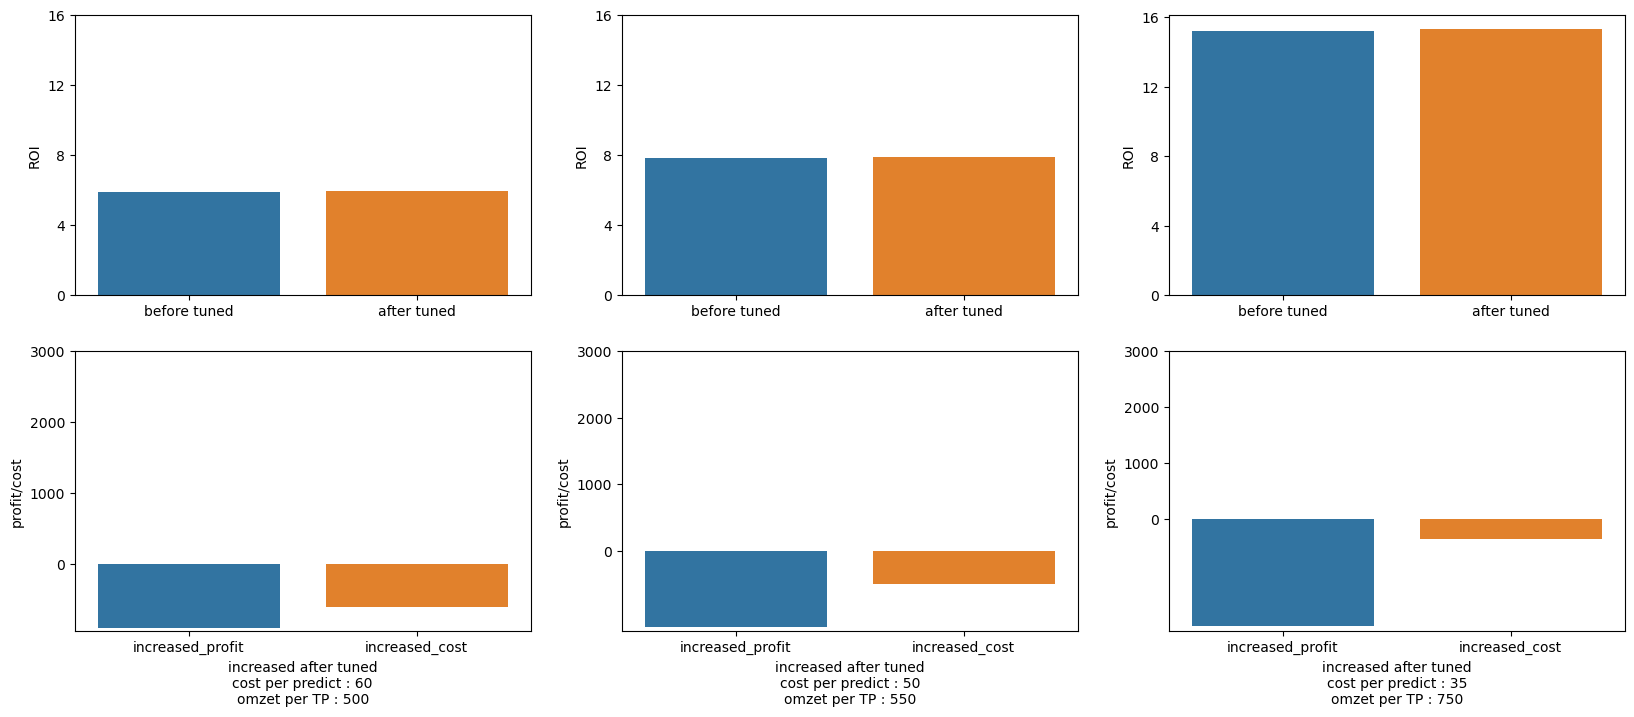

In [71]:
a = [500,550,750] # list omzet scenario
b = [60,50,35] # list cost scenario

n = 1

plt.figure(figsize=(20,8))

for i,j in zip(a,b):

    df_profit = df_tuned[['model']]

    df_profit['TP omzet'] = df_tuned['TP']*i
    df_profit['marketing cost'] = (df_tuned['TP']+df_tuned['FP'])*j
    df_profit['ROI'] = df_profit['TP omzet']/df_profit['marketing cost']
    df_profit['profit'] = df_profit['TP omzet']-df_profit['marketing cost']

    diff_cost = df_profit.iloc[1]['marketing cost'] - df_profit.iloc[0]['marketing cost']
    diff_profit =  df_profit.iloc[1]['profit'] - df_profit.iloc[0]['profit']

    df_diff = pd.DataFrame({
        'increased_profit':[diff_profit],
        'increased_cost':[diff_cost],
    })

    plt.subplot(2,3,n)
    ax = sns.barplot(data=df_profit,y='ROI',x='model')
    ax.set_yticks(range(0,17,4))
    ax.set(xlabel=None, ylabel='ROI')

    plt.subplot(2,3,n+3)
    ax = sns.barplot(data=df_diff)
    ax.set_yticks(range(0,4000,1000))
    ax.set(xlabel=f'increased after tuned\ncost per predict : {j}\nomzet per TP : {i}', ylabel='profit/cost')

    n += 1

---
### <br><b>7. Conclusion and Recommendation</b>

In [72]:
from PIL import Image

• Say you are telemarketer manager and given marketing campaign to X_test<br>
• But you have limited resource and just able to make 300 calling for that data<br>
• Let's compare if you blindly make a 300 call vs you make filtering using this model<br>

In [73]:
n_call = 300
omzet = 500
cost = 60

df_pred = pd.DataFrame(columns=['prediction','TP','FP'])

fp = y_ts.value_counts()[0]
tp = y_ts.value_counts()[1]
p_total = fp+tp

fp_pred = int(fp/p_total*n_call)
tp_pred = int(tp/p_total*n_call)

df_pred.loc[len(df_pred)] = 'without machine learning',tp_pred,fp_pred

fp = confusion_matrix(y_ts,y_pred)[0][1]
tp = confusion_matrix(y_ts,y_pred)[1][1]
p_total = fp+tp

fp_pred = int(fp/p_total*n_call)
tp_pred = int(tp/p_total*n_call)

df_pred.loc[len(df_pred)] = 'using machine learning',tp_pred,fp_pred

# Count profit
def profit(TP):
    a = TP*omzet
    b = n_call*cost
    return a-b

df_pred['profit'] = df_pred['TP'].apply(profit)

print(f'this is the result ratio of y_test\n{y_ts.value_counts()}\n')
print(f'this is prediction based on y_test and machine learning')
df_pred

this is the result ratio of y_test
0    814
1    744
Name: deposit, dtype: int64

this is prediction based on y_test and machine learning


,prediction,TP,FP,profit
0,without machine learning,143,156,53500
1,using machine learning,215,84,89500


• From prediction we know that using **machine learning have better TP and profit**<br>
• In the graphic we use worst scenario so if we use **better scenario the profit would be higher**<br>

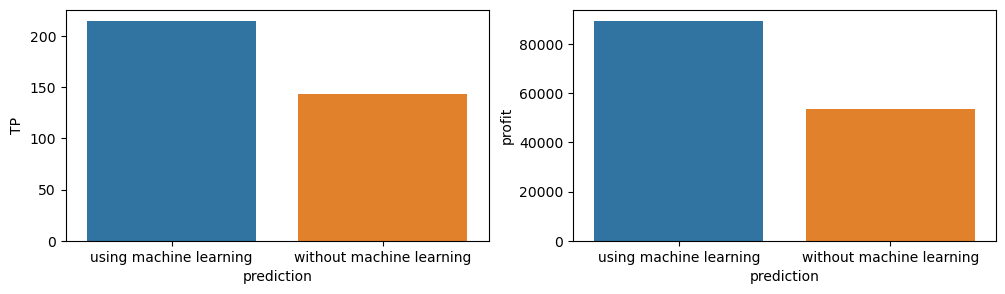

In [74]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
ax = sns.barplot(
    data=df_pred.sort_values(by='TP',ascending=False),
    x='prediction',
    y='TP',
)
ax.set_ylabel('TP')

plt.subplot(1,2,2)
ax = sns.barplot(
    data=df_pred.sort_values(by='profit',ascending=False),
    x='prediction',
    y='profit',
)
ax.set_ylabel('profit')

plt.show()

**Conclussion :**

• Here Classification Report from our tuned model<br>
• We get 69% right chance for predict '0'<br>
• We get 70% right chance for predict '1'<br>
• Our model able to predict 75% all of '0' data avaliable<br>
• Our model able to predict 63% all of '1' data avaliable<br>

In [75]:
print(
    classification_report(y_ts,y_pred),
    f'\nprecision score : {precision_score(y_ts,y_pred)}',
    f'\nrecall score : {recall_score(y_ts,y_pred)}',
)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       814
           1       0.72      0.63      0.67       744

    accuracy                           0.70      1558
   macro avg       0.71      0.70      0.70      1558
weighted avg       0.71      0.70      0.70      1558
 
precision score : 0.7166921898928025 
recall score : 0.6290322580645161


**Model pros and cons (after tuned):**

(+) Balancing the Precision (cost minimize) and Recall (omzet maximize)<br>
(+) Highly recommended for high margin<br>

(-) Sometimes balance Precision and Recall are not best solution for business problem<br>
(-) Only learn from 6232 data samples which still far compared to data in finance industry<br>`

**Recommendation :**

• Give model more data to learn<br>
• Enrich feature by gather more data of custommer<br>
• Use precision/f05_score/f1_score for low margin and f2_score/recall for high margin<br>
• If we lacks of resource (i.e. manpower, budget, time) it's better for use f05_score to precision (resource efficient)<br>
• If our resource able to marketing many as possible datapool it's better for use f2_score to recall (omzet maximize)

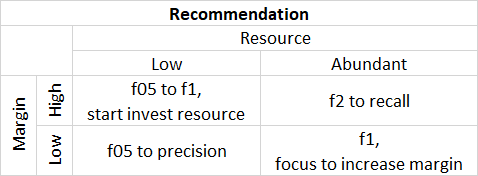

In [76]:
import IPython.display
from IPython.display import Image

Image('C:\\Users\\idamh\\Pictures\\Saved Pictures\\recom capstone 3.png')

---
### <br><b>8. Save as Pickle and Joblib</b>

In [77]:
import pickle
import joblib


In [78]:
pickle.dump(after_tuned, open('model_caps3_pickle.sav', 'wb'))
joblib.dump(after_tuned, 'model_caps3_joblib')

['model_caps3_joblib']

## <b>Good Luck and Thank You</b>